# ISE529_Final Project_Grupo Bimbo Inventory Demand 

#### Roger Wang (5184990581)

#### Danlei Zhang (9993088581)

#### Yunqing Ma (4552265616)

#### Hao (Vic) Wang (9785480181)

#### Wednesday Section

# Data Exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

### Plot 1: show the distribution of target values (Demanda_uni_equil)

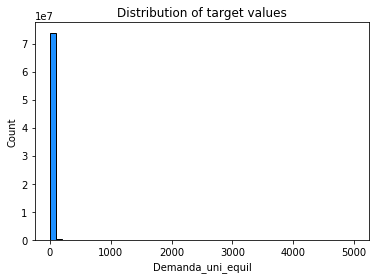

In [3]:
target = train['Demanda_uni_equil'].tolist()

def label_plot(title, x, y):
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    
plt.hist(target, bins=50,facecolor='dodgerblue',edgecolor = 'black')
label_plot('Distribution of target values','Demanda_uni_equil', 'Count')

plt.show()

This graph is not clear since the range of our x-axis was too big. Therefore, we reset the range to (0,50) and plot it again

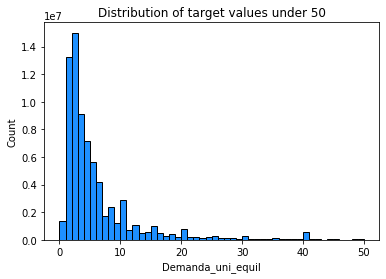

In [4]:
plt.hist(target, bins=50, range=(0, 50),
         facecolor='dodgerblue',
         edgecolor = 'black')
label_plot('Distribution of target values under 50', 
           'Demanda_uni_equil', 'Count')
plt.show()

This distribution shows that some target values (Demanda_uni_equil) are much more common than the others. Those target values are between 1 and 10.

### Plot 2: show the distribution of inventory demand in each week

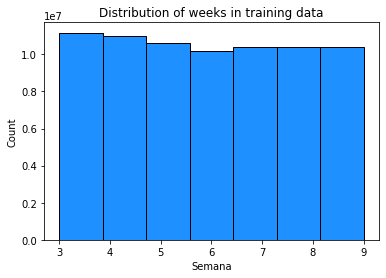

In [5]:
semana = train['Semana']
plt.hist(train['Semana'].tolist(),bins=7,facecolor='dodgerblue',edgecolor = 'black')
label_plot('Distribution of weeks in training data','Semana', 'Count')
plt.show()

Based on the graph, the demands are evenly distributed in each week.

### Plot 3: show the distribution of target value over time

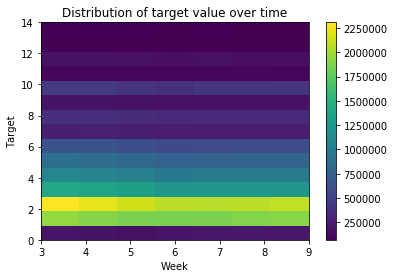

In [6]:
timing = train.sample(1000000)
timing = train.loc[train['Demanda_uni_equil'] < 15] 
# We only want to look at the most common values

plt.hist2d(timing['Semana'].tolist(),
           timing['Demanda_uni_equil'].tolist(),bins=[7, 15])
plt.colorbar()
label_plot('Distribution of target value over time', 'Week', 'Target')
plt.show()

Based on this plot, we found that the target value decreased when week number increased. Therefore, we believe it is a time-serial problem